In [1]:
# import os
# os.environ["KERAS_BACKEND"] = "plaidml.keras.backend"
from keras.models import Sequential
from keras import layers
from pickle import dump,load
from keras.preprocessing.text import Tokenizer
from tqdm import tnrange, tqdm_notebook
import pandas as pd
import numpy as np

from keras.models import Sequential
from keras import layers
import spacy
import string

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.calibration import CalibratedClassifierCV

import seaborn as sns

import re
import string
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from nltk.stem import WordNetLemmatizer 
from nltk.corpus import stopwords
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTEENN
from sklearn.utils import class_weight
import os
%matplotlib inline

/Users/hari/anaconda3/envs/NSSdatascience/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
drugs_model = pd.read_csv('drugs_model2.csv').astype('U')

In [3]:
drugs_model.head()

,Unnamed: 0,UniqueID,drugName,condition,review,rating,date,usefulCount,review_length,word_count,clean_text,rating_class,rating_class_numeric
0,0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9.0,2012-05-20,27,79,17,it has no side effect i take it in combination...,positive,2
1,1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8.0,2010-04-27,192,741,141,my son is halfway through his fourth week of i...,positive,2
2,2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5.0,2009-12-14,17,755,133,i used to take another oral contraceptive whic...,neutral,1
3,3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8.0,2015-11-03,10,448,89,this is my first time using any form of birth ...,positive,2
4,4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9.0,2016-11-27,37,719,134,suboxone has completely turned my life around ...,positive,2


In [4]:
X =drugs_model['clean_text'].values.reshape(-1,1)
y=drugs_model['rating_class']#.values.reshape(-1,1)



In [5]:
# stop = set(stopwords.words("english"))
# stop.update(("mg","day", 'hv','month', 'first','time', 'took','week', 'year', 'phentermine', 'adipex', 'belviq', 'contrave'))

In [6]:

tfidf= TfidfVectorizer(ngram_range = (4,4), min_df = 10,sublinear_tf=True)
X =tfidf.fit_transform(X.ravel())

In [7]:
print(X.shape)
print(y.shape)

(215063, 95230)
(215063,)


In [8]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.30, random_state = 42)

In [9]:
# from imblearn.over_sampling import SMOTE
# #from imblearn.combine import SMOTEENN
# method = SMOTE()

# # Create the resampled feature set
# X_resampled, y_resampled = method.fit_sample(X_train, y_train)

In [10]:
# # # Print the value_counts on the original labels y
# #print(pd.value_counts(pd.Series(y)))

# print(drugs_model.rating_class.value_counts())

# Print the value_counts
#print(pd.value_counts(pd.Series(y_resampled)))

In [11]:
classes = np.unique(y)
print(classes)

['negative' 'neutral' 'positive']


In [12]:
print(X.shape)
print(y.shape)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(215063, 95230)
(215063,)
(150544, 95230)
(64519, 95230)
(150544,)
(64519,)


In [13]:
# from sklearn.utils import class_weight
# class_weights = class_weight.compute_class_weight('balanced'
#                                                ,np.unique(y_train)
#                                                ,y_train)

# class_weight_dict = dict(enumerate(class_weights))
# print(class_weight_dict)

In [14]:
#param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100] }
#param_grid = {'C': np.linspace(1, 10, 10), 'penalty': ['l1', 'l2']}


In [15]:
#logmod= GridSearchCV(LogisticRegression(class_weight = {0: 2.,1: 4.,2: .5}), param_grid, verbose =2, cv = 3)

In [16]:
# logmod.fit(X_train, y_train)

# logmod.best_params_

In [17]:
# print("Tuned Logistic Regression Parameter: {}".format(logmod.best_params_))
# print("Tuned Logistic Regression Accuracy: {}".format(logmod.best_score_))

In [18]:
#log_mod = LogisticRegression(class_weight = {0: 2.,1: 4.,2: .5}, C=10, penalty = 'l2')

In [19]:
#log_mod.fit(X_train,y_train)

In [20]:
# predictions = log_mod.predict(X_test)
# print(confusion_matrix(y_test,predictions))
# print('\n', 'Classification report')
# print(classification_report(y_test,predictions))
# # Print the overall accuracy
# print('\n', 'accuracy Score')
# print(metrics.accuracy_score(y_test,predictions))

In [21]:
#probabilities_logmod = log_mod.predict_proba(X_test)

In [22]:
# y = label_binarize(y, classes=[0,1,2])
# n_classes = y.shape[1]
# y_dummies=pd.get_dummies(y_test)

In [23]:
# fpr = dict()
# tpr = dict()
# roc_auc = dict()
# for i in range(n_classes):
#     fpr[i], tpr[i], _ = roc_curve(y_dummies.iloc[:, i], probabilities_logmod[:, i])
#     roc_auc[i] = auc(fpr[i], tpr[i])
# colors = ['blue', 'red', 'green']
# for i, color in zip(range(n_classes), colors):
#     plt.plot(fpr[i], tpr[i], color=color,
#              label='ROC curve of class {0} (area = {1:0.2f})'
#              ''.format(i, roc_auc[i]))
# plt.plot([0, 1], [0, 1])
# plt.xlim([-0.05, 1.0])
# plt.ylim([0.0, 1.05])
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('Receiver operating characteristic for multi-class data')
# plt.legend(loc="lower right");

In [24]:
# from imblearn.under_sampling import RandomUnderSampler
# rus = RandomUnderSampler(return_indices=True)
# X_rus, y_rus, id_rus = rus.fit_sample(X_train, y_train)

In [25]:
# from imblearn.over_sampling import RandomOverSampler
# ros = RandomOverSampler(return_indices=True)
# X_ros, y_ros, id_ros = ros.fit_sample(X_train, y_train)

In [26]:
# # # Print the value_counts on the original labels y
# #print(pd.value_counts(pd.Series(y)))

# print(drugs_model.rating_class.value_counts())

# # Print the value_counts
# print(pd.value_counts(pd.Series(y_rus)))

In [27]:
# # # Print the value_counts on the original labels y
# #print(pd.value_counts(pd.Series(y)))

# print(drugs_model.rating_class.value_counts())

# # Print the value_counts
# print(pd.value_counts(pd.Series(y_ros)))

In [28]:
alphas = np.arange(0.001,1, step=0.1)

# Define train_and_predict()
def train_and_predict(alpha):
    # Instantiate the classifier: nb_classifier
    mnb = MultinomialNB(alpha=alpha)
    # Fit to the training data
    mnb.fit(X_train, y_train)
    # Predict the labels: pred
    pred = mnb.predict(X_test)
    # Compute accuracy: score
    score = metrics.accuracy_score(y_test, pred)
    return score

# Iterate over the alphas and print the corresponding score
for alpha in alphas:
    print('Alpha: ', alpha)
    print('Score: ', train_and_predict(alpha))
    print()

Alpha:  0.001
Score:  0.8156202049008819

Alpha:  0.101
Score:  0.810675924921341

Alpha:  0.201
Score:  0.8049566794277655

Alpha:  0.30100000000000005
Score:  0.8007408670314171

Alpha:  0.401
Score:  0.7965095553247881

Alpha:  0.501
Score:  0.7931617043041584

Alpha:  0.6010000000000001
Score:  0.7897983539732482

Alpha:  0.7010000000000001
Score:  0.7870239774330042

Alpha:  0.801
Score:  0.7851175622684791

Alpha:  0.901
Score:  0.7832111471039539



In [29]:
print(X.shape)
print(y.shape)

(215063, 95230)
(215063,)


In [30]:
#score = cross_val_score(mnb, X.reshape(-1,1), y, cv = 2)

In [31]:
mnb = MultinomialNB(alpha = 0.001,fit_prior=True)
mnb.fit(X_train,y_train)

MultinomialNB(alpha=0.001, class_prior=None, fit_prior=True)

In [32]:
# scores = cross_val_score(mnb, X.reshape(-1,1), y, cv=2, verbose = 10)
# scores 

In [33]:
mnb_predictions = mnb.predict(X_test)
print(confusion_matrix(y_test,mnb_predictions))
print('\n', 'Classification report')
print(classification_report(y_test,mnb_predictions))
# Print the overall accuracy
print('\n', 'accuracy Score')
print(metrics.accuracy_score(y_test,mnb_predictions))

print('\n', 'f1 Score')
print(metrics.f1_score(y_test, mnb_predictions, average='weighted'))

[[10089   182  5819]
 [  912  1723  3229]
 [ 1596   158 40811]]

 Classification report
              precision    recall  f1-score   support

    negative       0.80      0.63      0.70     16090
     neutral       0.84      0.29      0.43      5864
    positive       0.82      0.96      0.88     42565

   micro avg       0.82      0.82      0.82     64519
   macro avg       0.82      0.63      0.67     64519
weighted avg       0.82      0.82      0.80     64519


 accuracy Score
0.8156202049008819

 f1 Score
0.7975461768384874


In [34]:
probabilities_mnb = mnb.predict_proba(X_test)
class_labels = mnb.classes_
class_labels = class_labels.tolist()
y = label_binarize(y, classes=class_labels)
n_classes = y.shape[1]
y_dummies=pd.get_dummies(y_test)

In [35]:
class_labels

['negative', 'neutral', 'positive']

In [36]:
probabilities_mnb

array([[2.50413378e-05, 4.05411639e-04, 9.99569547e-01],
       [9.67528998e-01, 1.49453540e-02, 1.75256484e-02],
       [2.12318440e-01, 8.16882819e-05, 7.87599872e-01],
       ...,
       [8.52088144e-01, 1.30867124e-04, 1.47780988e-01],
       [3.22337643e-03, 1.31513622e-02, 9.83625261e-01],
       [3.83927950e-02, 2.41636375e-03, 9.59190841e-01]])

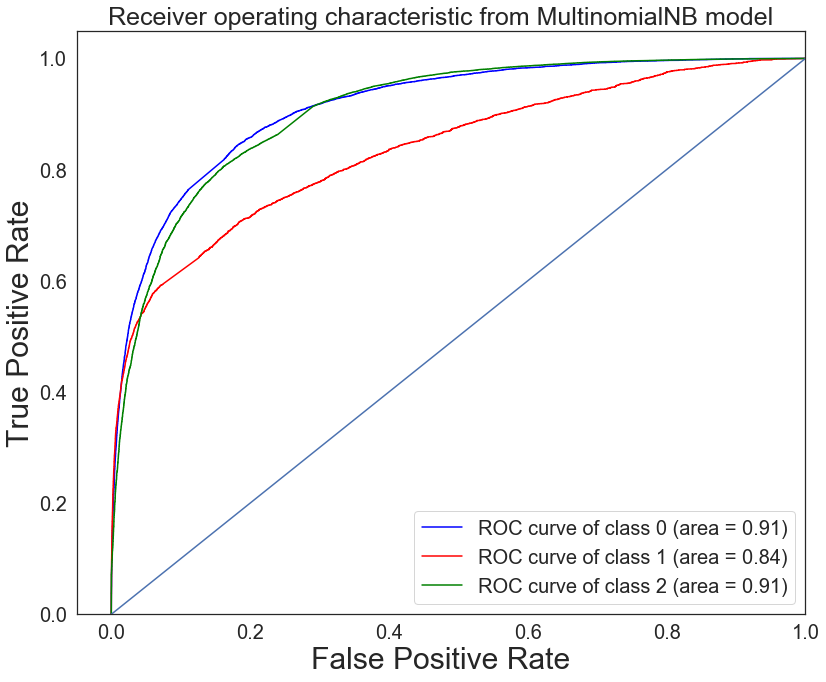

In [73]:
#plt.figure(figsize=(15,10))
sns.set_style("white")
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_dummies.iloc[:, i], probabilities_mnb[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
colors = ['blue', 'red', 'green']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))
    
plt.plot([0, 1], [0, 1])
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.xlabel('False Positive Rate', fontsize = 30)
plt.ylabel('True Positive Rate',fontsize = 30)
plt.title('Receiver operating characteristic from MultinomialNB model',fontsize = 25)
plt.tight_layout()
plt.legend(loc="lower right", fontsize = 20)
plt.savefig('roccurve all data.png');

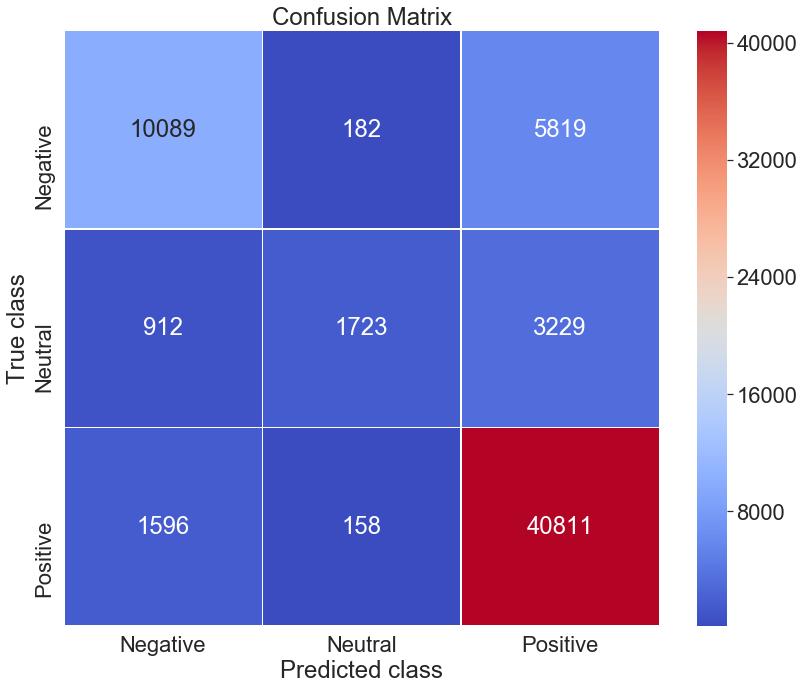

In [66]:
sns.set(rc={'figure.figsize':(12,10)}, font_scale=2)
ax= plt.subplot()
cm = confusion_matrix(y_test, mnb_predictions)
sns.heatmap(cm, annot=True, ax = ax, fmt='g', linewidths=.5, cmap='coolwarm'); #annot=True to annotate cells
# labels, title and ticks
ax.set_xlabel('Predicted class')
ax.set_ylabel('True class')
ax.set_title('Confusion Matrix')
plt.tight_layout()
ax.xaxis.set_ticklabels(['Negative',  'Neutral', 'Positive']); 
ax.yaxis.set_ticklabels(['Negative', 'Neutral', 'Positive'])
plt.savefig('confusion Matrix all data.png');

In [39]:
class_labels = mnb.classes_
class_labels = class_labels.tolist()
class_labels

['negative', 'neutral', 'positive']

In [40]:
def top_features(vectorizer, classifier, class_labels):
    """Prints features with the highest coefficient values, per class"""
    feature_names = vectorizer.get_feature_names()
    for i, class_label in enumerate(class_labels):
        top25 = np.argsort(classifier.coef_[i])[-10:]
        print("%s: %s" % (class_label,
              " ".join(feature_names[j] for j in top25)))

In [41]:
top_features(tfidf, mnb, class_labels)

negative: did not work for didn work for me to stop taking it but the side effects not work for me the side effects were the side effects are do not take this do not recommend this would not recommend this
neutral: ve been on it to stop taking it at the same time the side effects were ve been on this of the side effects have been on this been on it for but the side effects the side effects are
positive: has changed my life with no side effects this is the only in the morning and the only thing that so far so good the only side effect had no side effects been on it for for the first time


In [42]:
topn_class1= class_labels[2]
topn_class2= class_labels[1]
topn_class3= class_labels[0]

In [43]:
def important_features(vectorizer,clf,n):
    class_labels = clf.classes_
    feature_names =vectorizer.get_feature_names()
    topn_class1 = pd.DataFrame(sorted(zip(clf.feature_count_[2], feature_names),reverse=True)[:n],columns = ['Freq', 'Feature Name'])
    topn_class2 = pd.DataFrame(sorted(zip(clf.feature_count_[1], feature_names),reverse=True)[:n],columns = ['Freq', 'Feature Name'])
    topn_class3 = pd.DataFrame(sorted(zip(clf.feature_count_[0], feature_names),reverse=True)[:n],columns = ['Freq', 'Feature Name'])        
    return topn_class1, topn_class2, topn_class3


In [44]:
topn_class1, topn_class2, topn_class3 =important_features(tfidf,mnb,50)

In [45]:
positive_rating = topn_class1[['Feature Name', 'Freq']]
neutral_rating=topn_class2[['Feature Name', 'Freq']]
negative_rating=topn_class3[['Feature Name', 'Freq']]


In [46]:
positive_rating

,Feature Name,Freq
0,for the first time,230.656164
1,been on it for,225.362837
2,had no side effects,216.728669
3,the only side effect,215.822108
4,so far so good,208.086020
5,the only thing that,174.714170
6,in the morning and,155.324103
7,this is the only,153.611888
8,with no side effects,153.513602
9,has changed my life,153.217166


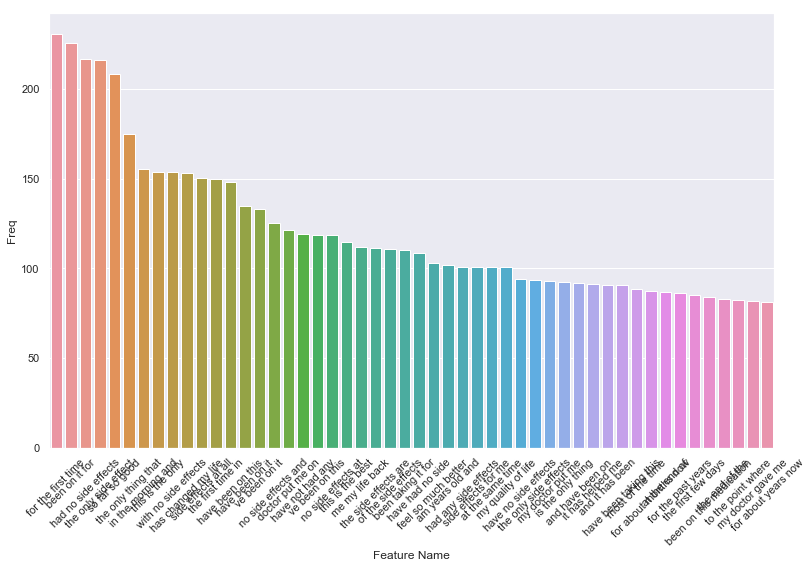

In [47]:
sns.set(rc={'figure.figsize':(13,8)})
h=sns.barplot(x="Feature Name", y="Freq", data=positive_rating)
h.set_xticklabels(h.get_xticklabels(), rotation=45);

In [48]:
capsule = np.array(Image.open("Download-Capsule-PNG-Images.png"))

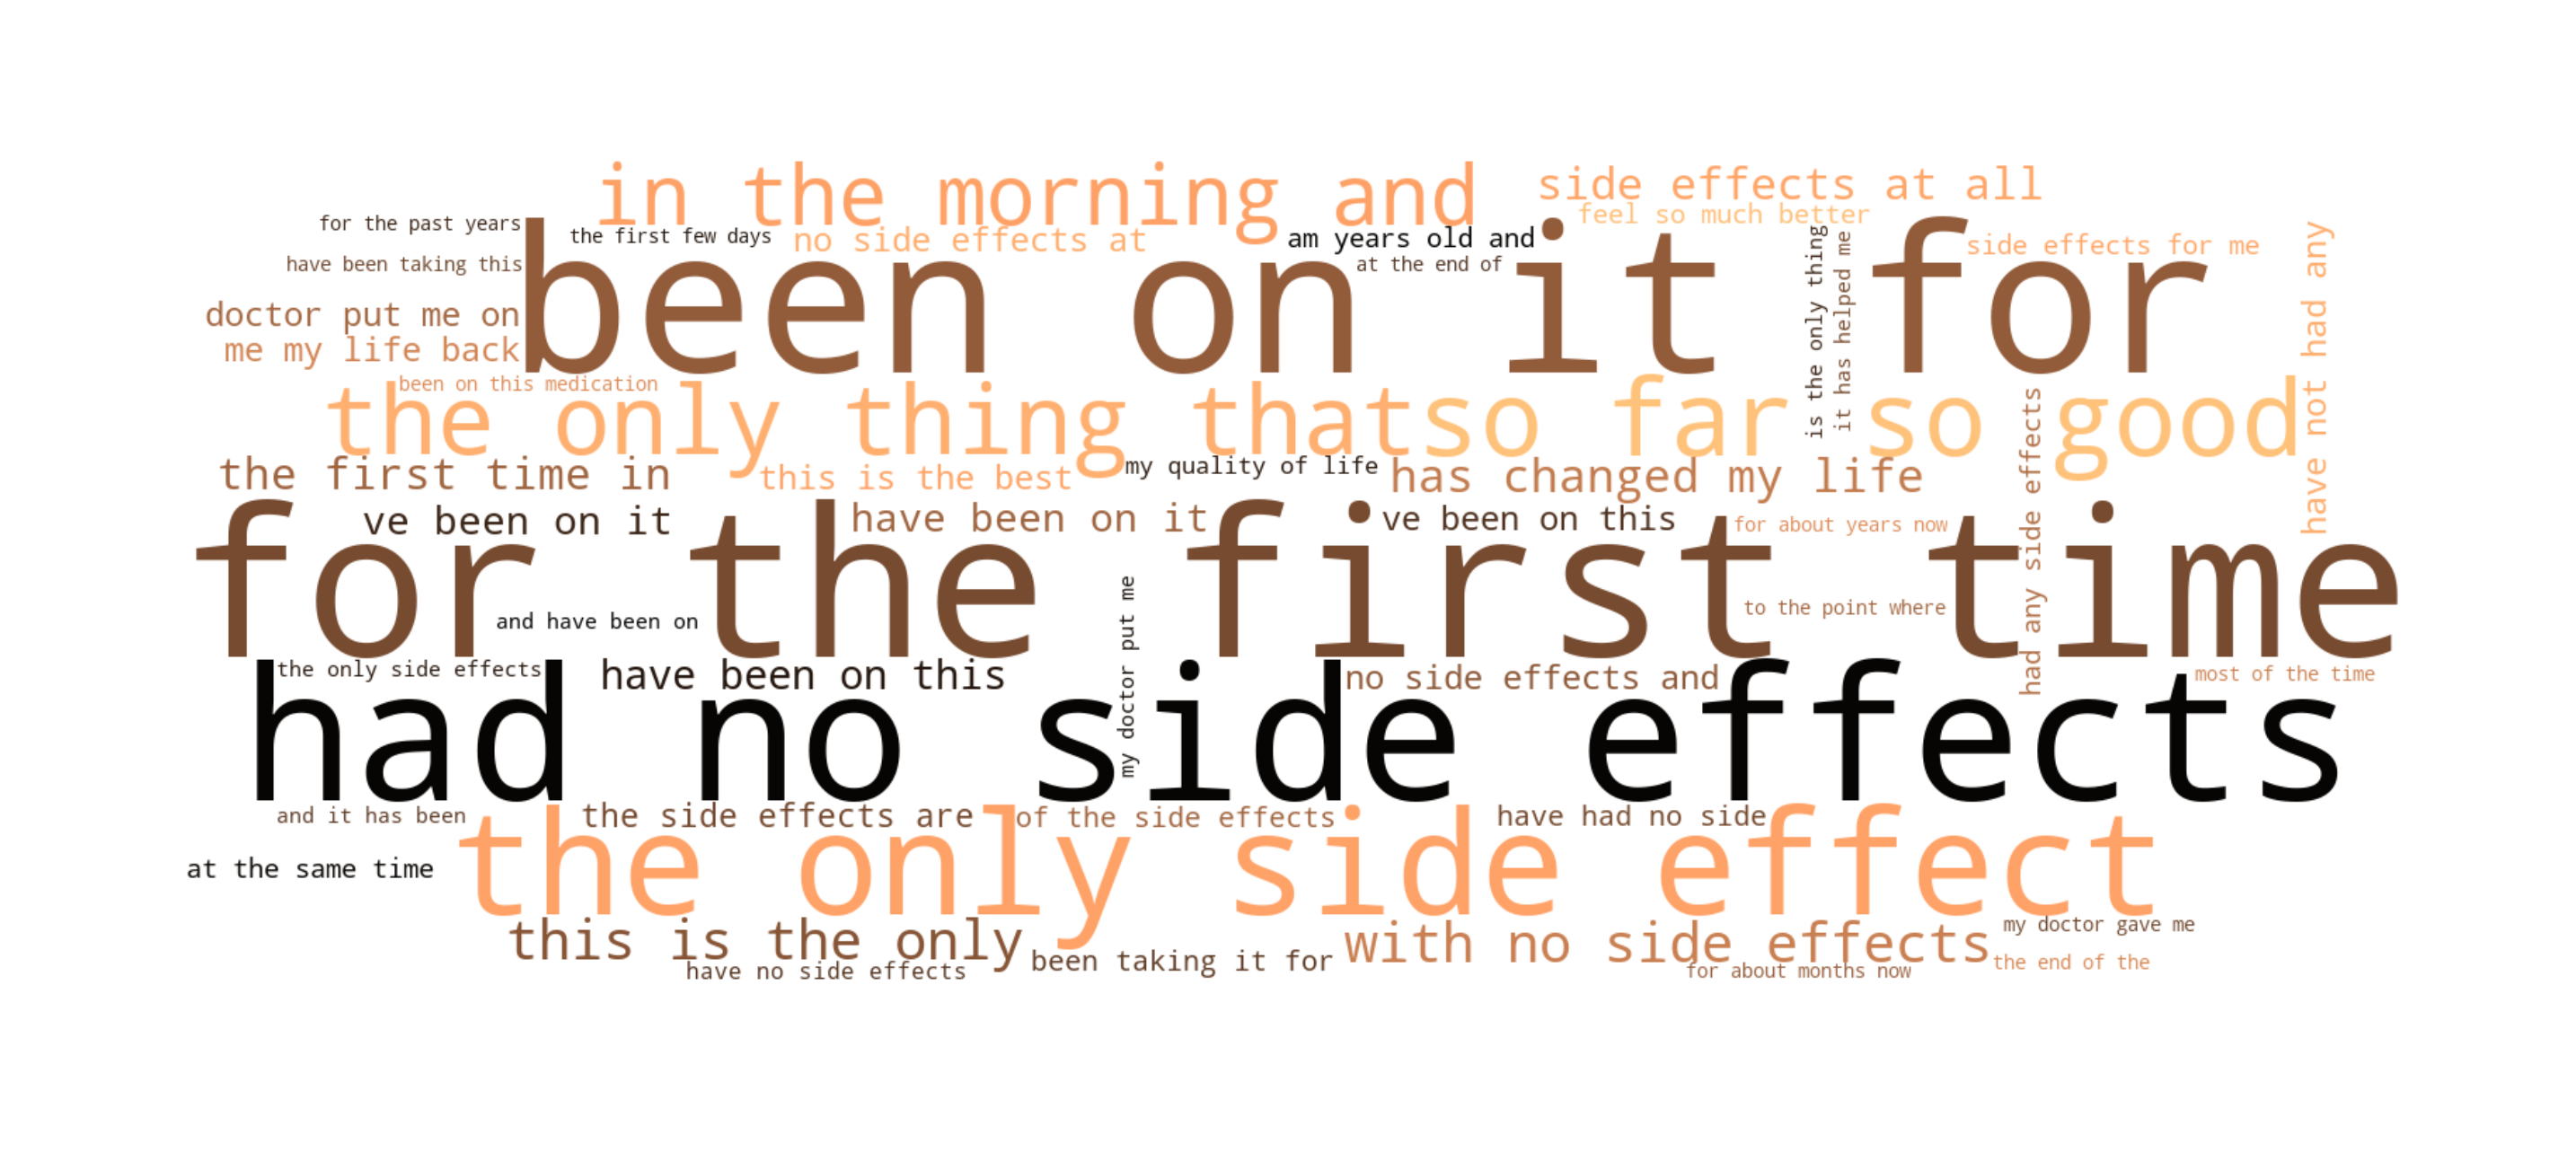

In [49]:
positive = {}
for w, x in positive_rating.values:
    positive[w] = x
wordcloud = WordCloud(width = 4000,
    height = 3000,background_color='white', mask = capsule,colormap=plt.cm.copper,collocations=False, random_state = 30)
wordcloud.generate_from_frequencies(positive)
plt.figure(figsize = (40, 30),
    
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.tight_layout()
plt.savefig('positive word cloud all data')
plt.show()


In [50]:
neutral_rating

,Feature Name,Freq
0,the side effects are,37.616934
1,but the side effects,33.021808
2,been on it for,31.001784
3,have been on this,26.469859
4,of the side effects,23.366386
5,ve been on this,23.259314
6,the side effects were,20.808790
7,at the same time,20.567533
8,to stop taking it,19.873571
9,ve been on it,17.741201


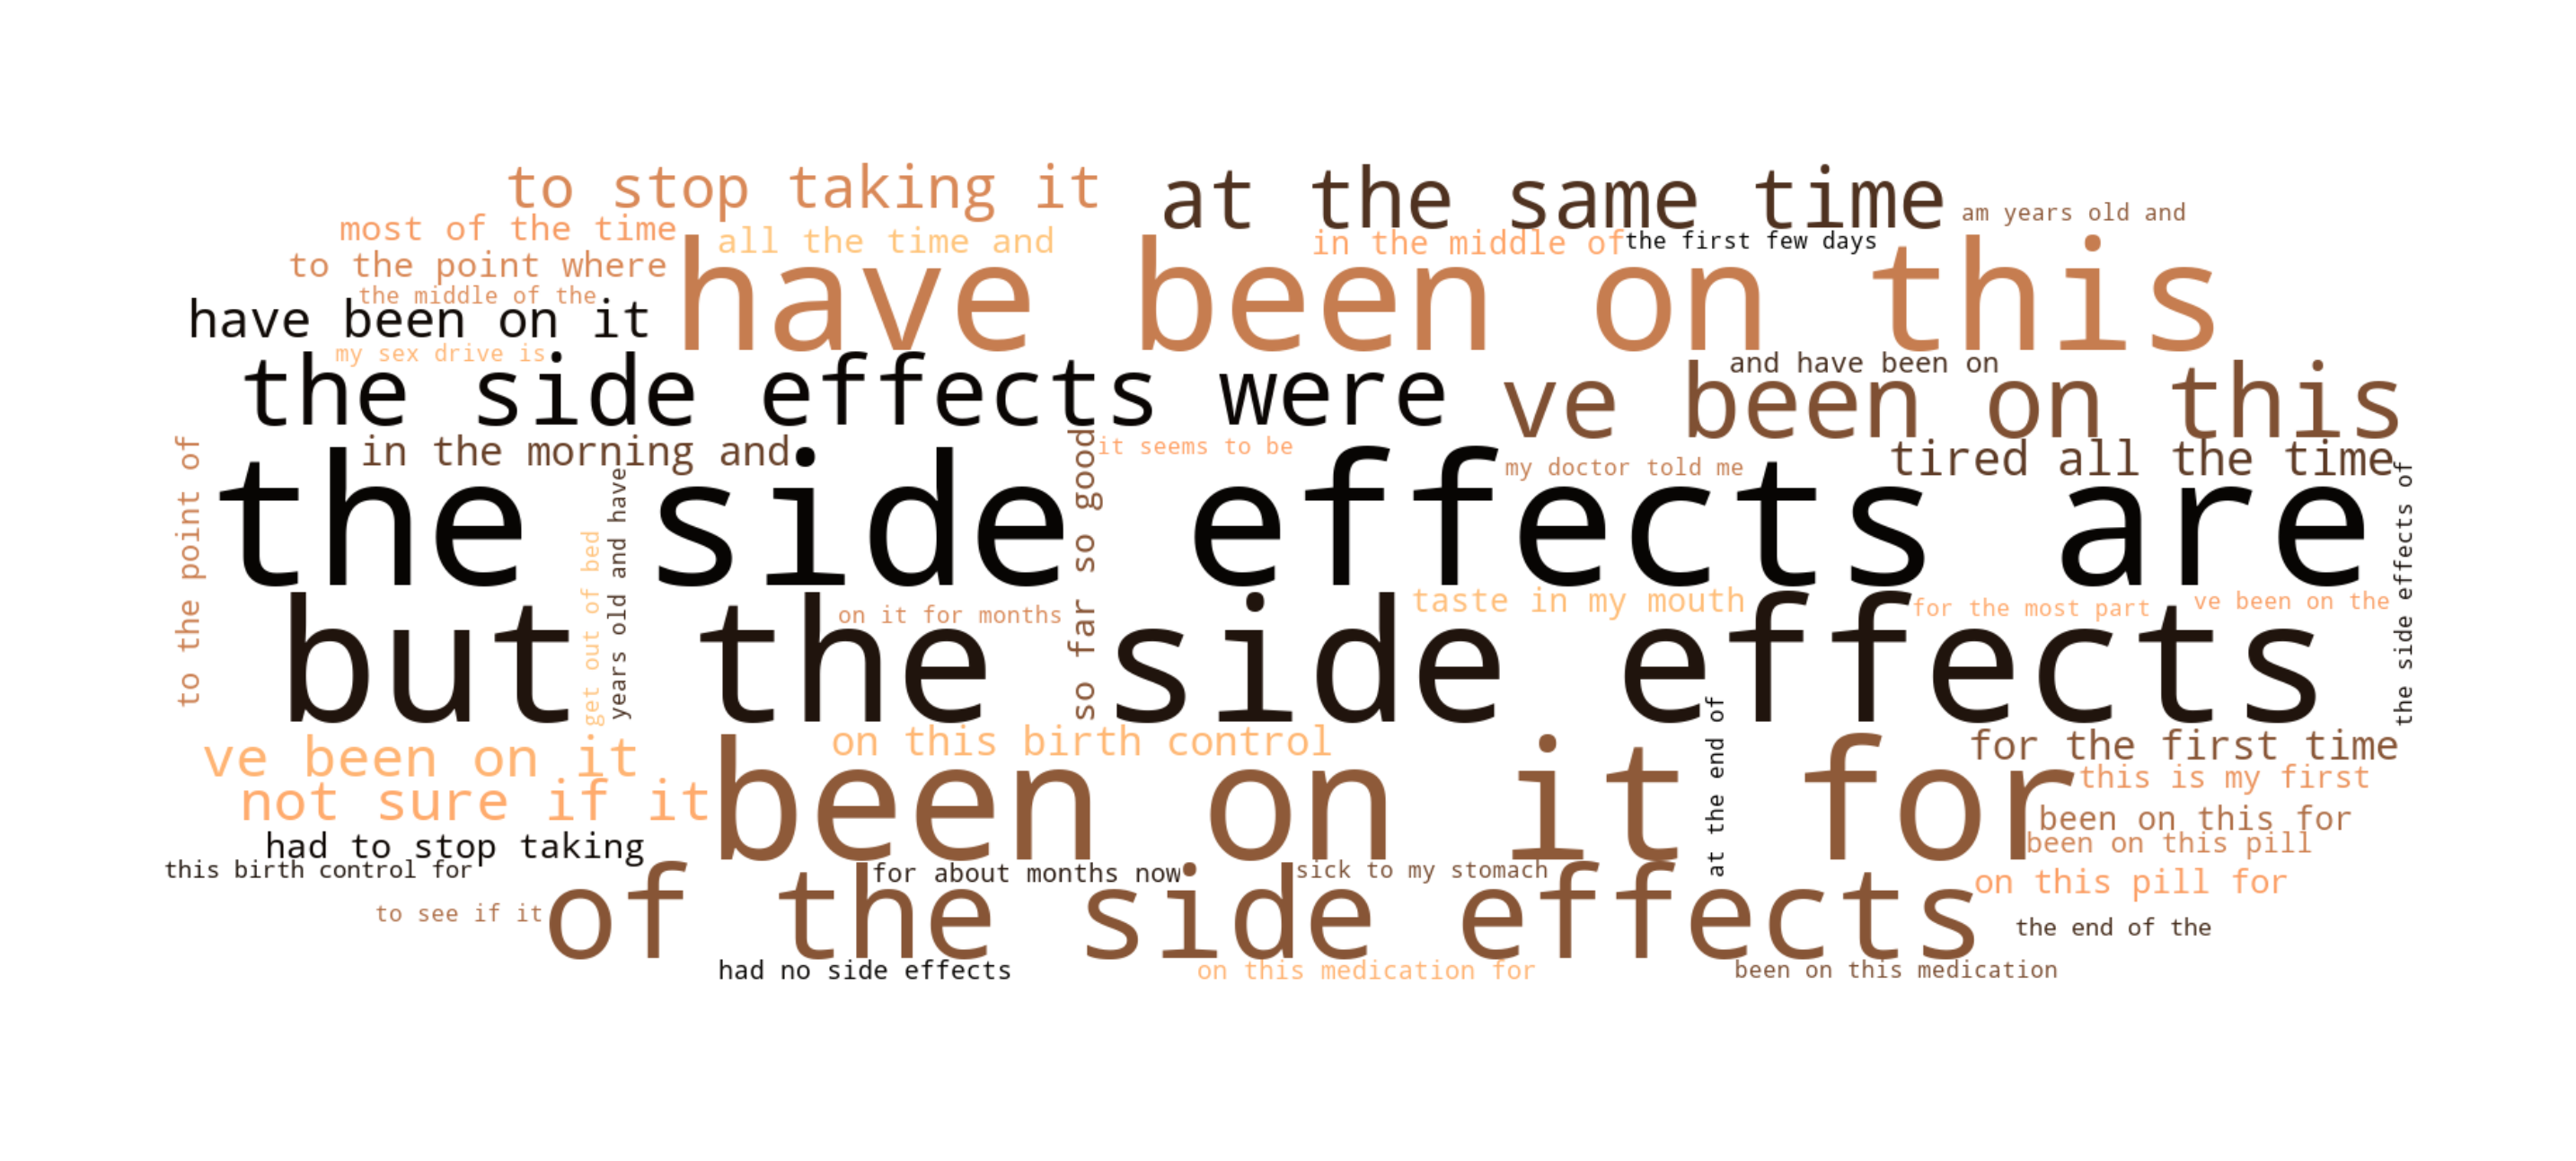

In [51]:
neutral = {}
for w, x in neutral_rating.values:
    neutral[w] = x
wordcloud = WordCloud(width = 3000,
    height = 2000,background_color='white',mask = capsule,colormap=plt.cm.copper, collocations=False, random_state = 20)
wordcloud.generate_from_frequencies(neutral)
plt.figure(figsize = (40, 30),
    
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.tight_layout()
plt.savefig('neutral word cloud all data')
plt.show()

In [52]:
negative_rating

,Feature Name,Freq
0,would not recommend this,72.388969
1,do not recommend this,69.255110
2,do not take this,68.600870
3,the side effects are,63.516652
4,the side effects were,63.002451
5,not work for me,62.907263
6,but the side effects,58.954246
7,to stop taking it,56.530909
8,didn work for me,56.497806
9,did not work for,55.948973


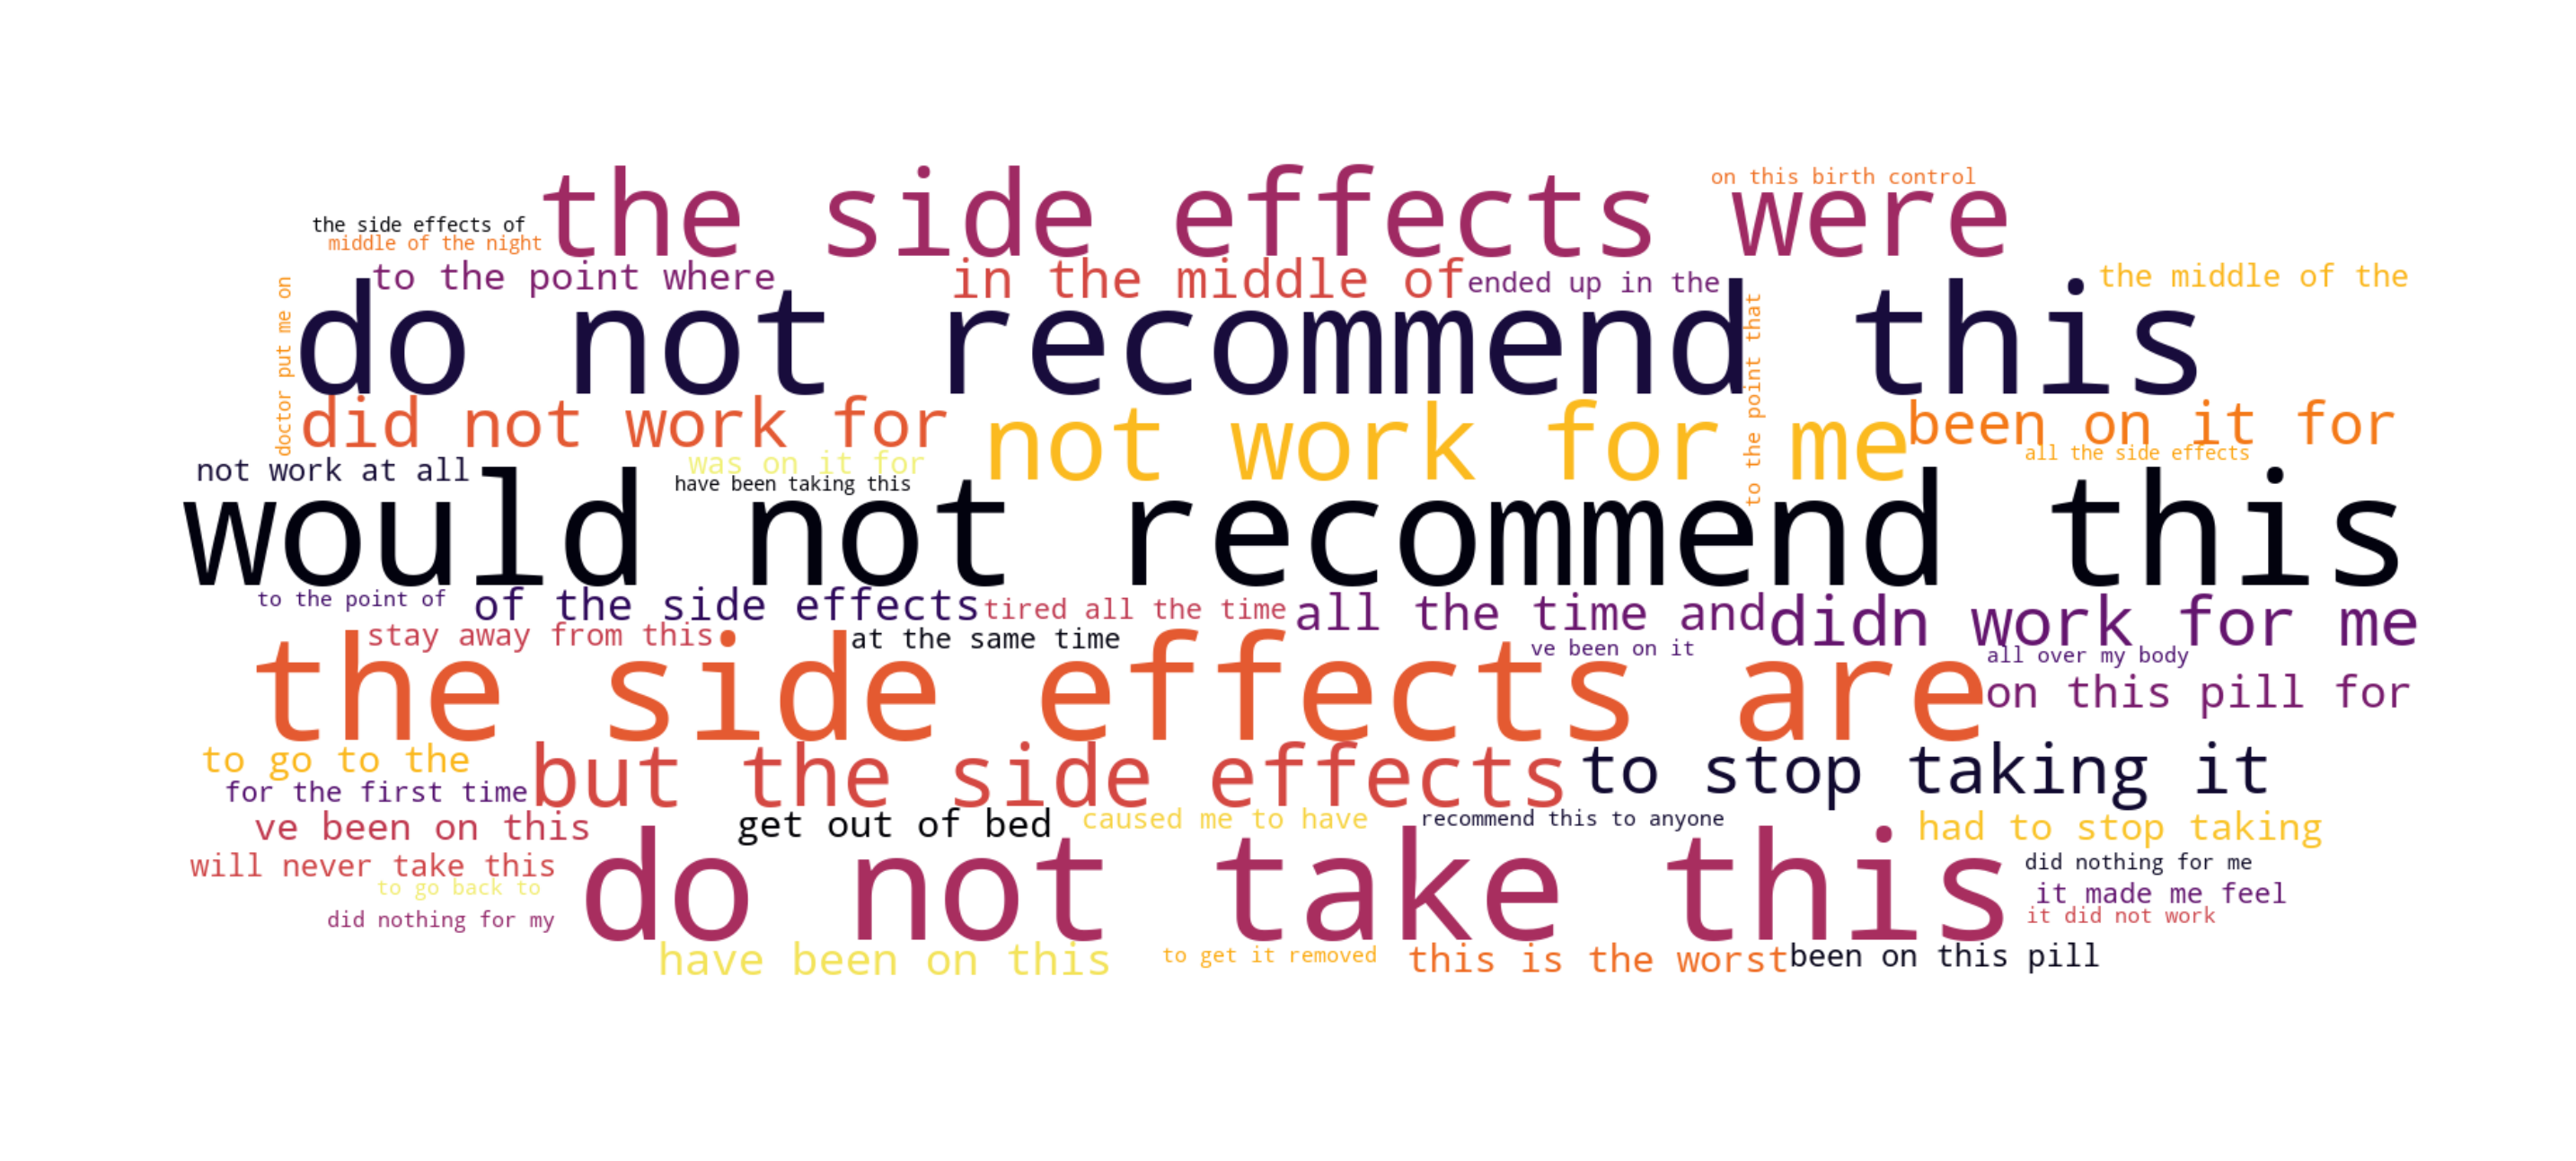

In [53]:
negative = {}
for w, x in negative_rating.values:
    negative[w] = x
wordcloud = WordCloud(width = 3000,
    height = 2000,background_color='white',mask = capsule, colormap=plt.cm.inferno, collocations=False, random_state = 20)
wordcloud.generate_from_frequencies(negative)
plt.figure(figsize = (40, 30),
    
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.tight_layout()
plt.savefig('negative word cloud all data')
plt.show()

In [54]:
X_train_tokens = tfidf.get_feature_names()
len(X_train_tokens)

95230

In [55]:
postive_token_count = mnb.feature_count_[2, :]
postive_token_count

array([0.6982788 , 0.        , 1.57376048, ..., 2.22034961, 4.42048956,
       0.90609302])

In [56]:
neutral_token_count = mnb.feature_count_[1, :]
neutral_token_count

array([0.        , 0.        , 0.        , ..., 0.3159768 , 0.        ,
       0.84177517])

In [57]:
negative_token_count = mnb.feature_count_[0, :]
negative_token_count

array([3.52967461, 2.76823399, 3.22555024, ..., 0.22690437, 0.        ,
       0.58934361])

In [58]:


# create a DataFrame of tokens with review counts
tokens = pd.DataFrame({'token':X_train_tokens, 'positive':postive_token_count, 'neutral':neutral_token_count, 
                       'negative':neutral_token_count}).set_index('token')
                     




In [59]:
tokens.sort_values('positive', ascending=False).reset_index().head()

,token,positive,neutral,negative
0,for the first time,230.656164,16.304277,16.304277
1,been on it for,225.362837,31.001784,31.001784
2,had no side effects,216.728669,13.634732,13.634732
3,the only side effect,215.822108,10.211600,10.211600
4,so far so good,208.086020,16.226888,16.226888


In [60]:
# add 1 to ham and spam counts to avoid dividing by 0
tokens['positive'] = tokens.positive + 1
tokens['neutral'] = tokens.neutral + 1
tokens['negative'] = tokens.negative + 1




In [61]:
# convert the ham and spam counts into frequencies
tokens['positive'] = tokens.positive / mnb.class_count_[2]
tokens['neutral'] = tokens.neutral / mnb.class_count_[1]
tokens['negative'] = tokens.negative / mnb.class_count_[0]



In [62]:
tokens.sort_values('positive', ascending=False).reset_index().head()

,token,positive,neutral,negative
0,for the first time,0.002323,0.001299,0.000462
1,been on it for,0.002270,0.002402,0.000854
2,had no side effects,0.002183,0.001099,0.000390
3,the only side effect,0.002174,0.000842,0.000299
4,so far so good,0.002096,0.001293,0.000460
